In [76]:
import pandas as pd
# bikesDiscretizado1                   Base3
# bikesDiscretizado2                   Base4
# bikesDiscretizado1Normalizado        Base5
# bikesDiscretizado2Normalizado        Base6
# bikesDiscretizado1Normalizado25      Base7
# bikesDiscretizado1Normalizado50      Base8
# bikesDiscretizado2Normalizado25      Base9
# bikesDiscretizado2Normalizado50      Base10


D1 = pd.read_csv('C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/Cidade/bikesDiscretizado1.csv', sep=';');
classeD1 = D1['qtd']
D2 = pd.read_csv('C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/Cidade/bikesDiscretizado2.csv', sep=';');
classeD2 = D2['qtd']

arquivo = 'bikesDiscretizado1'
CaminhoArquivo = 'C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/Cidade/bikes' + arquivo +'.csv'

base = pd.read_csv(CaminhoArquivo, sep=';');
base.head()

,0,1,2,3,4,5
0,2.050771,0.977830,0.049840,-1.410145,1.051242,-1.666652
1,2.064797,0.976308,0.079005,-1.418398,0.950561,-1.650928
2,2.058173,0.981118,0.053372,-1.408293,0.911410,-1.647987
3,2.040588,0.989681,0.020455,-1.401765,0.857329,-1.648221
4,2.033143,0.996369,0.018578,-1.404627,0.795894,-1.639875


In [77]:
import winsound
def FimAlgoritmo():
    winsound.Beep(1500,500);
    winsound.Beep(1500,500);

def FimMetrica():
    winsound.Beep(1000,200);
    
def FimBase():
    winsound.Beep(2000,1000);

In [78]:
# Import all the algorithms we want to test
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics

# # Prepare an array with all the algorithms
models = []
models.append(('SVC', SVC()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(200, ))))
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
# models.append(('DTR', DecisionTreeRegressor()))


# Prepare the configuration to run the test
seed = 7
results = []
names = []

if '1' in CaminhoArquivo:
    Y = classeD1
else:
    Y = classeD2

if '25' or '50' in CaminhoArquivo:
    X = base
else:
    X = base.drop('qtd', axis=1)

print('Done.')

Done.


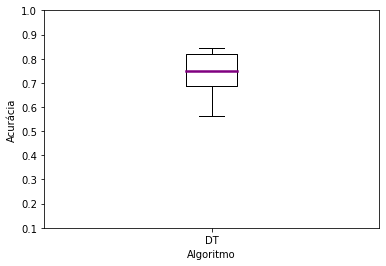

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns;

def GerarGraficos():
    fig = plt.figure()
    # fig.suptitle('Comparação de Algortimos')
    ax = fig.add_subplot(111)
    medianprops = dict(linestyle='-', linewidth=2.5, color='purple')
    ax.set_xlabel('Algoritmo')
    ax.set_ylabel('Acurácia')
    ax.set(ylim=(0.10, 1))
    meanlineprops = dict(linestyle='-', linewidth=2.5, color='purple')
    medianlineprops = dict(linestyle='-', linewidth=0)
    # meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')
    plt.boxplot(results, meanprops=meanlineprops, medianprops=medianlineprops ,meanline=True, showmeans=True)
    ax.set_xticklabels(names)
    # plt.clf()
    salvar='C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/NovosGraficos/'+arquivo
    plt.savefig(salvar, bbox_inches='tight')
    plt.figure(0).clear()
    # plt.show()

SVC
Acurácia:  0.45632082222589193
Precisão:  0.4517539259484519
Desvio P:  0.06490840324097275
Recall:  0.4562695178384833
---Restam:  5 ---
NB
Acurácia:  0.45004141535670944
Precisão:  0.4341393940318567
Desvio P:  0.041213687080696275
Recall:  0.44996628601283783
---Restam:  4 ---
KNN
Acurácia:  0.31794739725452886
Precisão:  0.3120780714861474
Desvio P:  0.04740762803944802
Recall:  0.317718248992387
---Restam:  3 ---
MLP
Acurácia:  0.47235590470274
Precisão:  0.49090512323104446
Desvio P:  0.04550075434154527
Recall:  0.4625906478578893
---Restam:  2 ---
RFC
Acurácia:  0.35205438517854476
Precisão:  0.3538048810635056
Desvio P:  0.07793274386719225
Recall:  0.3478548514703687
---Restam:  1 ---
DT
Acurácia:  0.3479513815166933
Precisão:  0.3820370357505894
Desvio P:  0.06463747583848387
Recall:  0.3515118226600985
---Restam:  0 ---
---Gerando gráficos---
FIM


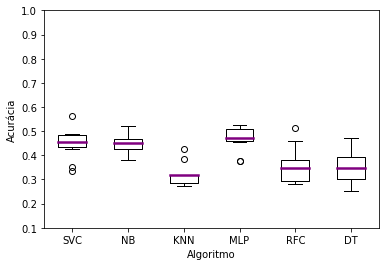

<Figure size 432x288 with 0 Axes>

In [79]:
# Every algorithm is tested and results are collected and printed
import warnings
warnings.simplefilter("ignore")

count=len(models)-1

for name, model in models:
    print(name)
    
    names.append(name)
    results.append(cross_val_score(model, X, Y, cv=10, scoring='accuracy'))
    FimMetrica()
    
    print ('Acurácia: ', cross_val_score(model, X, Y, cv=10, scoring='accuracy').mean())
    FimMetrica()
    print ('Precisão: ', cross_val_score(model, X, Y, cv=10, scoring='precision_macro').mean())
    FimMetrica()
    print ('Desvio P: ', cross_val_score(model, X, Y, cv=10, scoring='accuracy').std())
    FimMetrica()
    print ('Recall: ', cross_val_score(model, X, Y, cv=10, scoring='recall_macro').mean())
    
    FimAlgoritmo()
    print ('---Restam: ',count,'---')
    count-=1

FimBase()    
print('---Gerando gráficos---')
GerarGraficos()
print('FIM')

In [66]:
# The chi-square test was applied in the new data sets to support the feature selection with a P<.01


# Brier Score,
# area under the receiver operating characteristic curve (AUROC), 
# and area under the precision-recall curve (AUPRC). 